In [182]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
file_path = "extracted_names_paragraph.xlsx"
data = pd.read_excel(file_path, usecols=["interviewee",  "sentence", "sentence_index", "paragraph", "paragraph_index", "name_extracted"])

print(data)

In [ ]:
data['Name_Count'] = data['name_extracted'].str.count(',') + 1
df_sorted = data.sort_values('Name_Count', ascending=False)
print(df_sorted[['name_extracted', 'Name_Count']])

In [ ]:
import difflib

def keep_longest_name(names):
    name_list = [name.strip() for name in names.split(',')]
    longest_name = max(name_list, key=len)
    for name in name_list:
        if difflib.SequenceMatcher(None, longest_name, name).ratio() >= 0.9:
            return longest_name
    return names

data['Name_Extracted_Cleaned'] = data['name_extracted'].apply(keep_longest_name)

data['Name_Count'] = data['Name_Extracted_Cleaned'].str.count(',') + 1

df_sorted = data.sort_values('Name_Count', ascending=False)

print(df_sorted[['Name_Extracted_Cleaned', 'Name_Count']])

In [ ]:
df1 = data.sort_values('Name_Count', ascending=False)

print(df1[['name_extracted', 'Name_Count']])

In [ ]:
df1['Name_Extracted_Cleaned'] = df1['Name_Extracted_Cleaned'].str.replace(r'\[|\]|\s', '').str.strip('. ')
df1['Name_Extracted_Cleaned'] = df1['Name_Extracted_Cleaned'].str.replace("'", "")
df1['Num_Apostrophes'] = df1['Name_Extracted_Cleaned'].str.count("'")
#df1 = df1.drop(['Apostrophe_Count', 'Num_Apostrophes'], axis=1)


<ipython-input-22-0e8a0e43de15>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Name_Extracted_Cleaned'] = df1['Name_Extracted_Cleaned'].str.replace(r'\[|\]|\s', '').str.strip('. ')


In [ ]:
df1

In [ ]:
import re
pattern = r"(’|’s|n’t)"

error_rows = df1[df1['Name_Extracted_Cleaned'].str.contains(pattern, regex=True)]
print(error_rows)

In [ ]:
import re
pattern = r"(’|'s|n't)"
for index, row in df1.iterrows():
    name = row['Name_Extracted_Cleaned']
    corrected_name = re.sub(pattern, '', name)
    
    df1.at[index, 'Name_Extracted_Cleaned'] = corrected_name

In [ ]:
file_path = "df1.csv"
df1.to_csv(file_path, index=False)

In [ ]:
filtered_df = df1[df1['paragraph_index'] == 91849]
filtered_df

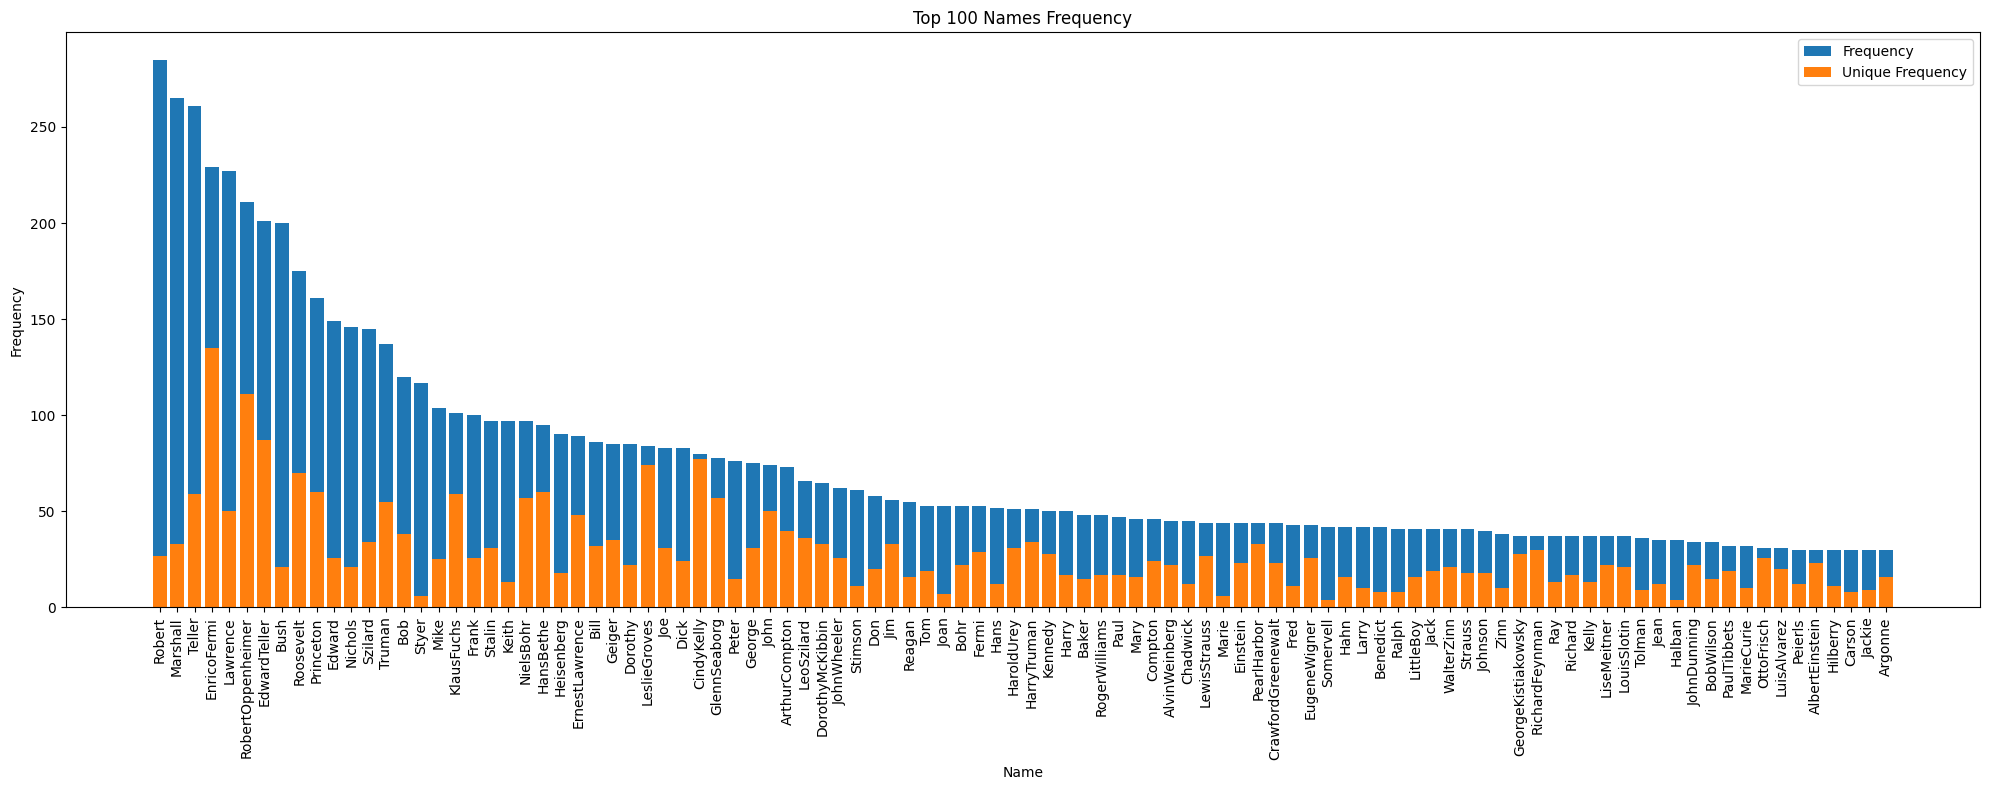

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

names = df1['Name_Extracted_Cleaned'].str.split(',').explode().str.strip()
name_freq_all = names.value_counts()

top_100_names = name_freq_all.nlargest(100).index.tolist()
top_100_df = pd.DataFrame({'Name': top_100_names})
top_100_df['Frequency'] = top_100_df['Name'].map(name_freq_all)

name_freq_unique = df1.groupby('Name_Extracted_Cleaned')['interviewee'].nunique()
top_100_df['Frequency_unique'] = top_100_df['Name'].map(name_freq_unique).fillna(1)

plt.figure(figsize=(20, 8))
plt.bar(top_100_df['Name'], top_100_df['Frequency'], label='Frequency')
plt.bar(top_100_df['Name'], top_100_df['Frequency_unique'], label='Unique Frequency')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Top 100 Names Frequency')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
name_freq_unique = df1.groupby('Name_Extracted_Cleaned')['interviewee'].nunique()
name_freq_unique.sort_values(ascending=False, inplace=True)
print(name_freq_unique)

Name_Extracted_Cleaned
EnricoFermi          135
RobertOppenheimer    111
EdwardTeller          87
CindyKelly            77
LeslieGroves          74
                    ... 
HarrisonBegay          1
HarrisMayer            1
HarrisHaroldLevee      1
HarrietMonroe          1
JohnFerguson           1
Name: interviewee, Length: 5470, dtype: int64


In [ ]:
df_merged = df1.merge(name_freq_unique, on='Name_Extracted_Cleaned', how='left')
df_merged.rename(columns={'frequency': 'frequency2'}, inplace=True)
#df_merged = df_merged.drop(['frequency2'], axis=1)
df_merged.rename(columns={'interviewee_y': 'frequency2'}, inplace=True)
df_merged

In [ ]:
file_path = "data_merged.csv"
df_merged.to_csv(file_path, index=False)

In [ ]:
All_names = name_freq_all.nlargest(500).index.tolist()

In [ ]:
All_names

In [ ]:
sum_of_top_300 = df_merged['frequency1'].head(300).sum()
print("Sum of top 300 frequencies1:", sum_of_top_300)


Sum of top 300 frequencies: 27757


Grouped The Names

In [ ]:
df_merged

In [ ]:
df_merged1 = df_merged
df_merged1

In [ ]:
set_A = set(df_merged['Name_Extracted_Cleaned'])


for name in All_names:
    related_names = [n for n in set_A if name in n]
    print(f"related to {name}：")
    for related_name in related_names:
        print(related_name)
    print()




In [ ]:
import pandas as pd

df_allnames = pd.DataFrame(columns=['Name', 'Related_Names'])

for name in All_names:
    related_names = [n for n in set_A if name in n]
    df_allnames = pd.concat([df_allnames, pd.DataFrame({'Name': [name], 'Related_Names': [related_names]})], ignore_index=True)

print(df_allnames)



In [ ]:
df_allnames

In [ ]:
related_names = df_allnames[df_allnames['Name'] == 'Robert']['Related_Names'].values[0]
print(related_names)


In [ ]:
related_names

['BernieWaldmanand', 'BernieWaldman']

In [ ]:
import pandas as pd
import numpy as np

for index, row in df_allnames.iterrows():
    name = row['Name']
    related_names = row['Related_Names'] 
    
    mask = df_merged['Name_Extracted_Cleaned'] == name
    df_temp = df_merged[mask]
    
    interviewees = df_temp['interviewee_x'].unique()
    
    for interviewee in interviewees:
        mask = (df_merged['interviewee_x'] == interviewee) & (df_merged['Name_Extracted_Cleaned'].isin(related_names))
        df_related = df_merged[mask]
        
        for related_name in df_related['Name_Extracted_Cleaned'].unique():
            print(f"Name: {name}, Interviewee: {interviewee}, Related Name: {related_name}")
        
        for _, row_to_replace in df_temp[df_temp['interviewee_x'] == interviewee].iterrows():
            closest_related_name = None
            min_diff = np.inf
            min_sentence_diff = np.inf
            max_length = 0

            for related_name in df_related['Name_Extracted_Cleaned'].unique():
                if related_name == name:
                    continue
                
                related_name_rows = df_related[df_related['Name_Extracted_Cleaned'] == related_name]
                diff = abs(related_name_rows['paragraph_index'] - row_to_replace['paragraph_index']).min()
                
                if diff == 0: 
                    sentence_diff = abs(related_name_rows['sentence_index'] - row_to_replace['sentence_index']).min()
                    
                    if sentence_diff < min_sentence_diff:
                        min_diff = diff
                        min_sentence_diff = sentence_diff
                        closest_related_name = related_name
                elif diff < min_diff: 
                    min_diff = diff
                    min_sentence_diff = np.inf
                    closest_related_name = related_name
                elif diff == min_diff: 
                    if len(related_name) > max_length: 
                        min_diff = diff
                        min_sentence_diff = np.inf
                        max_length = len(related_name)
                        closest_related_name = related_name

            mask = (df_merged['Name_Extracted_Cleaned'] == name) & (df_merged['interviewee_x'] == interviewee) & (df_merged.index == row_to_replace.name)
            df_merged.loc[mask, 'Name_Extracted_Cleaned'] = closest_related_name



In [ ]:
df_merged1

In [ ]:
import pandas as pd
file_path = "Names.xlsx"
df_merged1 = pd.read_excel(file_path, sheet_name = "data_merged1", usecols=["interviewee_x",  "sentence", "paragraph", "paragraph_index", "Name_Extracted_Cleaned" ])
print(df_merged1)

In [ ]:
import pandas as pd

df_merged1['Name_Without_Last'] = df_merged1['Name_Extracted_Cleaned'].str[:-1]

mask = (df_merged1['Name_Extracted_Cleaned'].str.endswith('s')) & (df_merged1['Name_Without_Last'].isin(df_merged1['Name_Extracted_Cleaned']))

df_merged1.loc[mask, 'Name_Extracted_Cleaned'] = df_merged1.loc[mask, 'Name_Without_Last']

df_merged1 = df_merged1.drop('Name_Without_Last', axis=1)

In [ ]:
file_path = "data_merged1.csv"
df_merged1.to_csv(file_path, index=False)

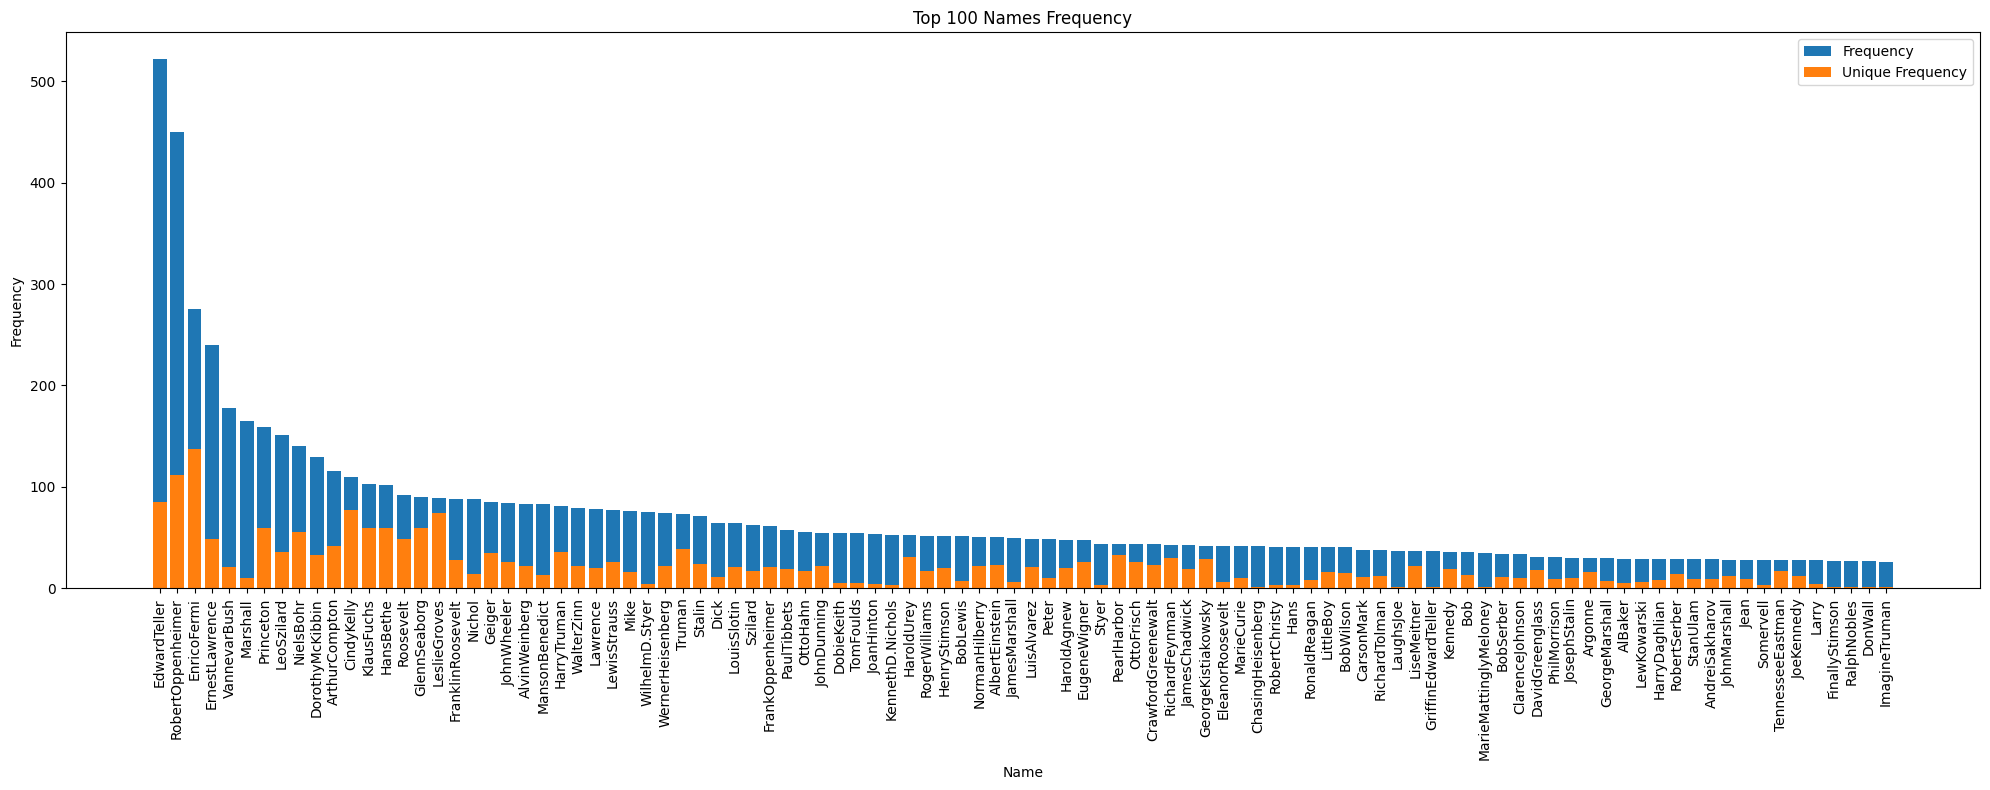

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

names = df_merged1['Name_Extracted_Cleaned'].str.split(',').explode().str.strip()
name_freq_all = names.value_counts()

top_100_names = name_freq_all.nlargest(100).index.tolist()
top_100_df = pd.DataFrame({'Name': top_100_names})
top_100_df['Frequency'] = top_100_df['Name'].map(name_freq_all)

name_freq_unique = df_merged1.groupby('Name_Extracted_Cleaned')['interviewee_x'].nunique()
top_100_df['Frequency_unique'] = top_100_df['Name'].map(name_freq_unique).fillna(1)

plt.figure(figsize=(20, 8))
plt.bar(top_100_df['Name'], top_100_df['Frequency'], label='Frequency')
plt.bar(top_100_df['Name'], top_100_df['Frequency_unique'], label='Unique Frequency')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Top 100 Names Frequency')
plt.legend()
plt.tight_layout()
plt.show()

Some processing

In [ ]:
import pandas as pd
file_path = "Names.xlsx"
df_merged1 = pd.read_excel(file_path, usecols=["interviewee_x",  "sentence", "paragraph", "paragraph_index", "Name_Extracted_Cleaned" ])
print(df_merged1)

In [ ]:
import pandas as pd

df_merged1['Name_Without_Last'] = df_merged1['Name_Extracted_Cleaned'].str[:-1]

mask = (df_merged1['Name_Extracted_Cleaned'].str.endswith('s')) & (df_merged1['Name_Without_Last'].isin(df_merged1['Name_Extracted_Cleaned']))

df_merged1.loc[mask, 'Name_Extracted_Cleaned'] = df_merged1.loc[mask, 'Name_Without_Last']

df_merged1 = df_merged1.drop('Name_Without_Last', axis=1)

In [ ]:
file_path = "data_merged1.csv"
df_merged1.to_csv(file_path, index=False)

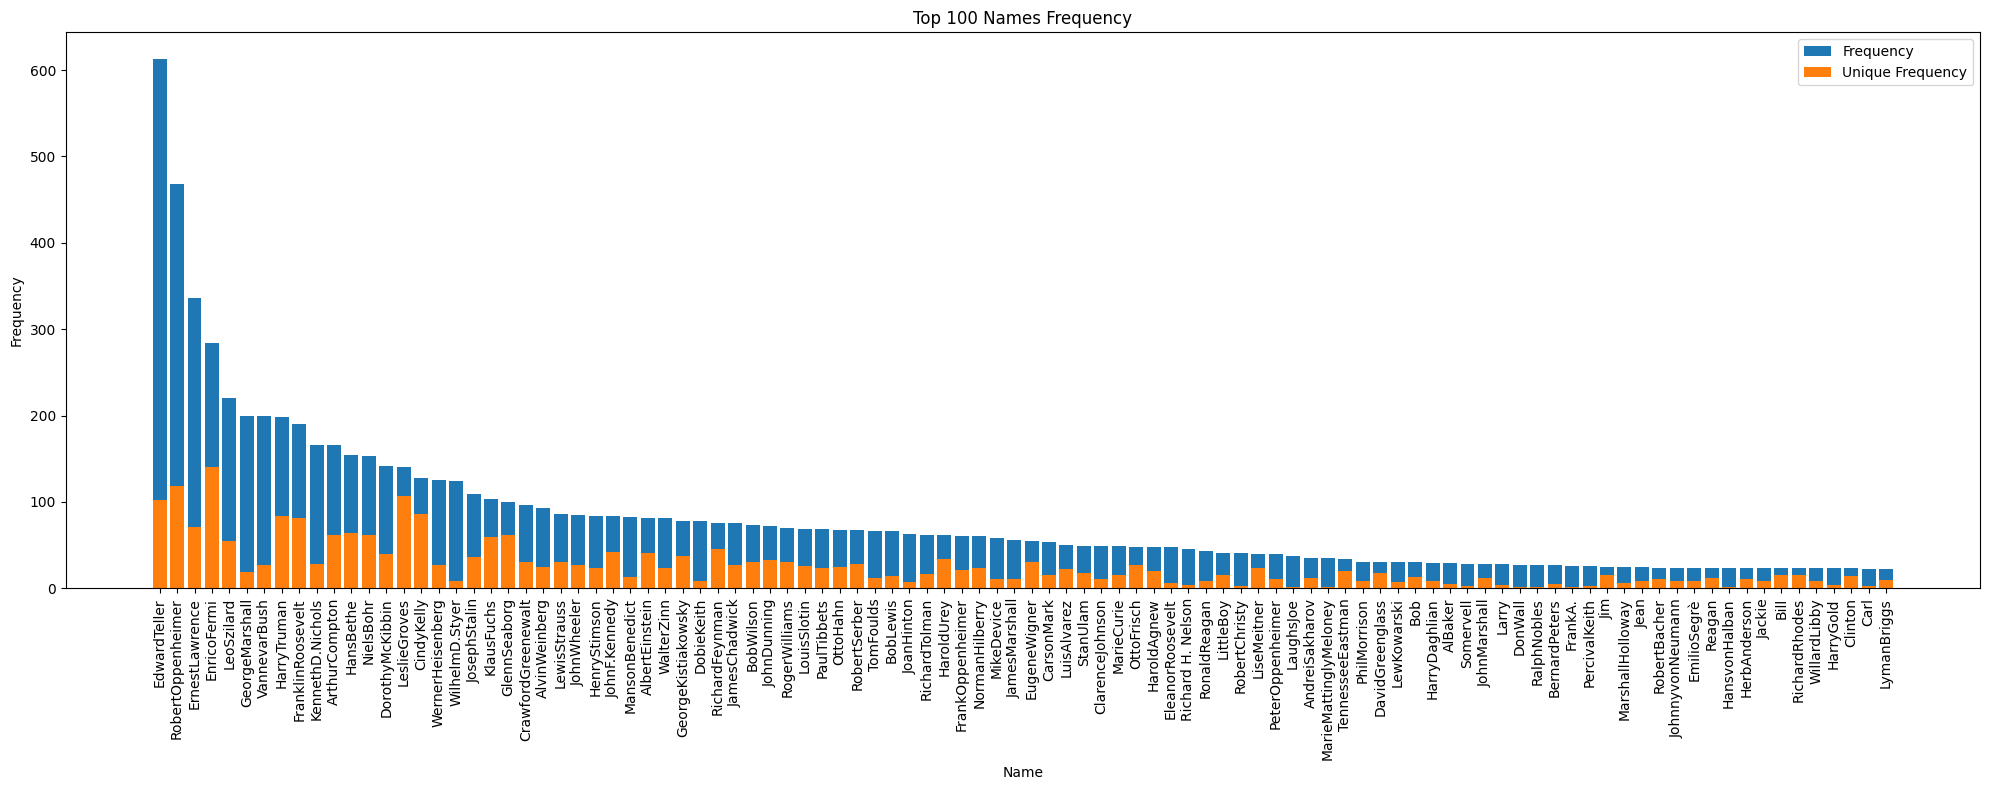

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

names = df_merged1['Name_Extracted_Cleaned'].str.split(',').explode().str.strip()
name_freq_all = names.value_counts()

top_100_names = name_freq_all.nlargest(100).index.tolist()
top_100_df = pd.DataFrame({'Name': top_100_names})
top_100_df['Frequency'] = top_100_df['Name'].map(name_freq_all)

name_freq_unique = df_merged1.groupby('Name_Extracted_Cleaned')['interviewee_x'].nunique()
top_100_df['Frequency_unique'] = top_100_df['Name'].map(name_freq_unique).fillna(1)

plt.figure(figsize=(20, 8))
plt.bar(top_100_df['Name'], top_100_df['Frequency'], label='Frequency')
plt.bar(top_100_df['Name'], top_100_df['Frequency_unique'], label='Unique Frequency')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Top 100 Names Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [188]:
df_merged1

,interviewee_x,sentence,paragraph,paragraph_index,Name_Extracted_Cleaned,Name_group_index
2146,Lydia Martinez,"The Tellers [Edward and Mici], I went and bab...","Yes. The Tellers [Edward and Mici], I went an...",18856,EdwardTeller,1
675,Marshall Rosenbluth,I supposed Teller was always pretty messianic.,"Because, Fuchs was there when at least the ear...",41347,EdwardTeller,1
677,Marshall Rosenbluth,I never understood why Teller wanted to form t...,"Well, I say, the person who I think they had t...",41364,EdwardTeller,1
678,Marshall Rosenbluth,"I guess one thing Teller always provided, prob...","No, I mean, it took an invention, and it certa...",41335,EdwardTeller,1
679,Marshall Rosenbluth,"Well, I have to say when one reads the chronic...","So, it didn’t have to be soccer ball sized in ...",41324,EdwardTeller,1
...,...,...,...,...,...,...
17742,Ronald E. Mickens’ Interview,"You got Virginia State, you have Norfolk.",Virginia contains a relatively large number of...,6872,VirginiaState,2154
17743,Ronald E. Mickens’ Interview,There’s a fellow who was at the University of ...,"If you look at the period, the United States ...",6944,HubertMackThaxton,2154
17744,Zane Bell,"It does work, too.” Actually, Edison found that.","I tried to make mercuric tungstate. “Well, it ...",7126,Edison,2154
17745,Ronald E. Mickens’ Interview,"The center there that included Morehouse, Morr...","Atlanta University, the name Clark Atlanta, th...",6975,ClarkCollege,2154


In [187]:
name_counts = df_merged1['Name_Extracted_Cleaned'].value_counts()
name_ranks = name_counts.rank(method='min', ascending=False).astype(int)

df_merged1['Name_group_index'] = df_merged1['Name_Extracted_Cleaned'].map(name_ranks)

df_merged1.sort_values(by='Name_Extracted_Cleaned', key=lambda col: col.map(name_counts), ascending=False, inplace=True)

In [189]:
file_path = "name_grouped_top50.csv"
df_merged1.to_csv(file_path, index=False)

Name and Topic

In [ ]:
file_path = "paragraph_topic.csv"
topic_data = pd.read_csv(file_path, usecols=["name", "paragraph", "paragraph_index", "topic"])

print(topic_data)

In [ ]:
import pandas as pd

merged_df = pd.merge(df1, topic_data, on='paragraph_index', how='left')
merged_df['topic'] = merged_df['topic'].fillna('')
merged_df.drop('topic', axis=1, inplace=True)
print(merged_df)
